###Libraries you'll likely need

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

###Importing data

In [146]:
income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']

### Exploratory Data Analysis

In [147]:
#Checking column types
income94.info()
income94.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           32561 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          32561 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      32561 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [148]:
income94.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [149]:
#Checking missing values
income94.workclass.unique()

income94 = income94.replace(" ?", np.NaN)
income94.isna().sum()

age                      0
workclass             1836
fnlwgt                   0
education                0
education_num            0
marital_status           0
occupation            1843
relationship             0
race                     0
sex                      0
capital_gain             0
capital_loss             0
hours_per_week           0
native_country         583
gross_income_group       0
dtype: int64

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group,capital_velocity
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,gain
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,broke-even
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,broke-even
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,broke-even
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,broke-even


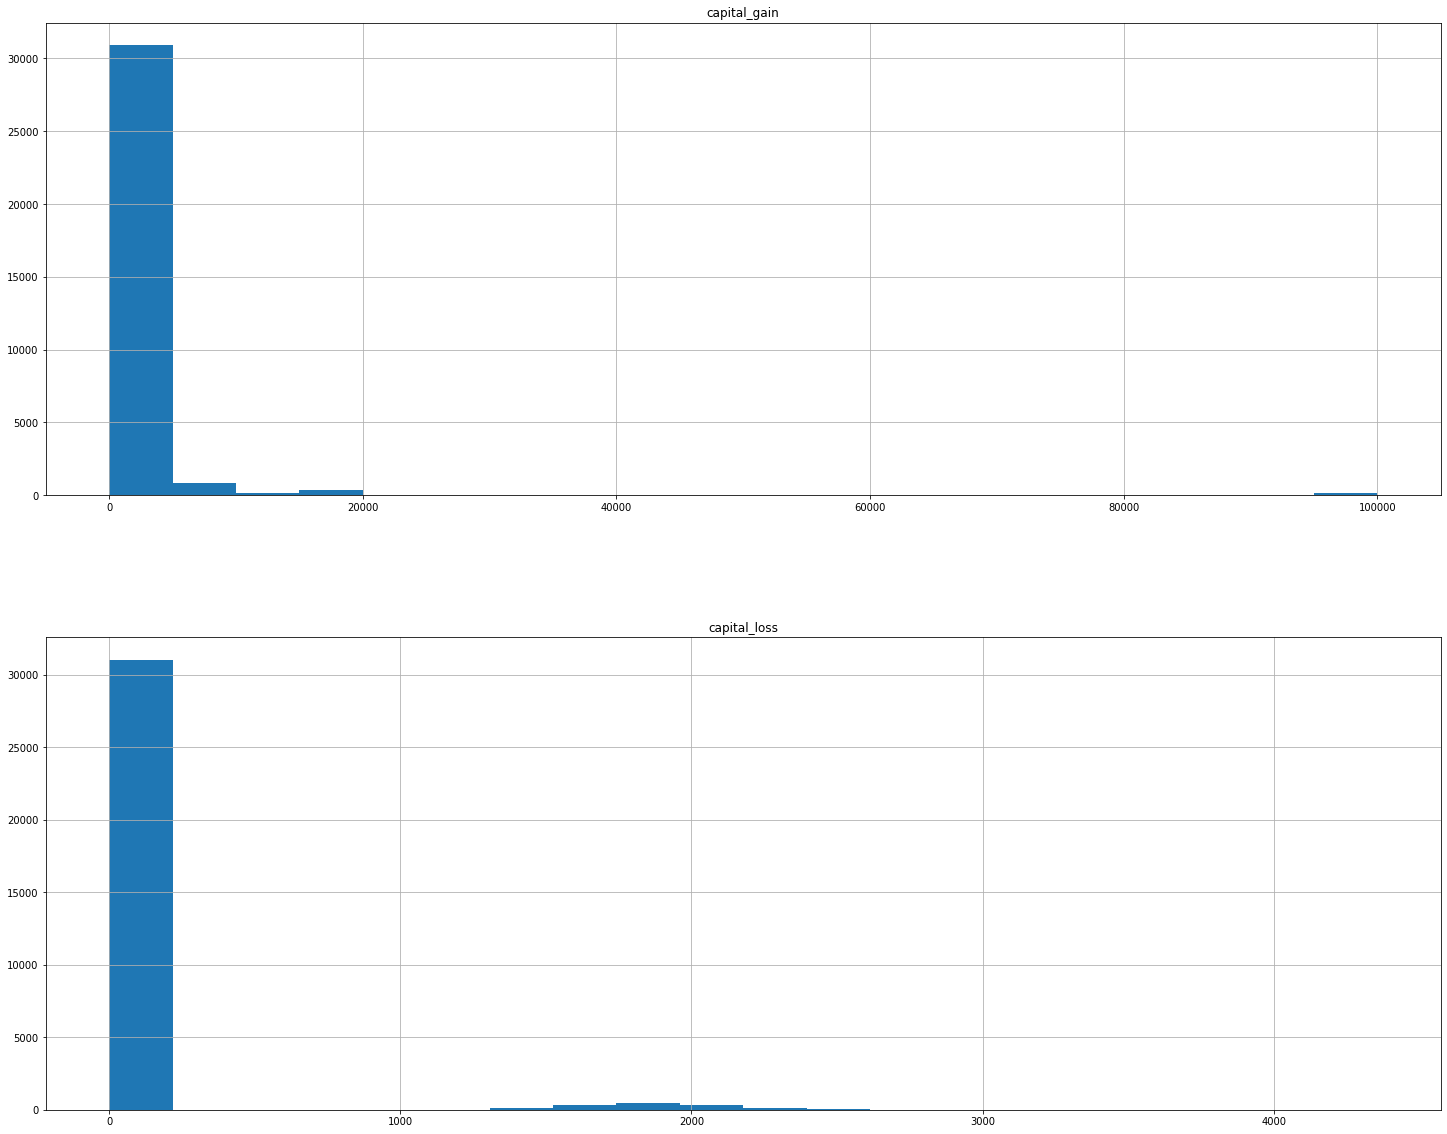

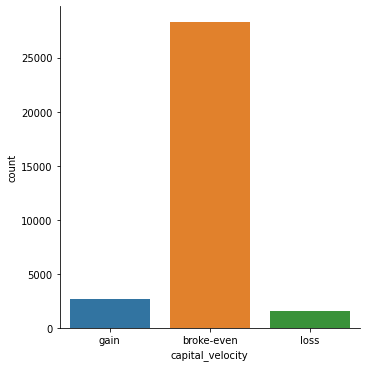

In [150]:
# Capital Gains and Losses
fig, ax = plt.subplots(2, figsize=(25,20))
income94.hist(bins=20, column='capital_gain', ax=ax[0])
income94.hist(bins=20, column='capital_loss', ax=ax[1])

income94['capital_velocity'] = "broke-even"
income94.loc[income94.capital_gain - income94.capital_loss < 0, 'capital_velocity'] = "loss"
income94.loc[income94.capital_gain - income94.capital_loss > 0, 'capital_velocity'] = "gain"

sns.catplot(data=income94, x='capital_velocity', kind="count")
income94.head()

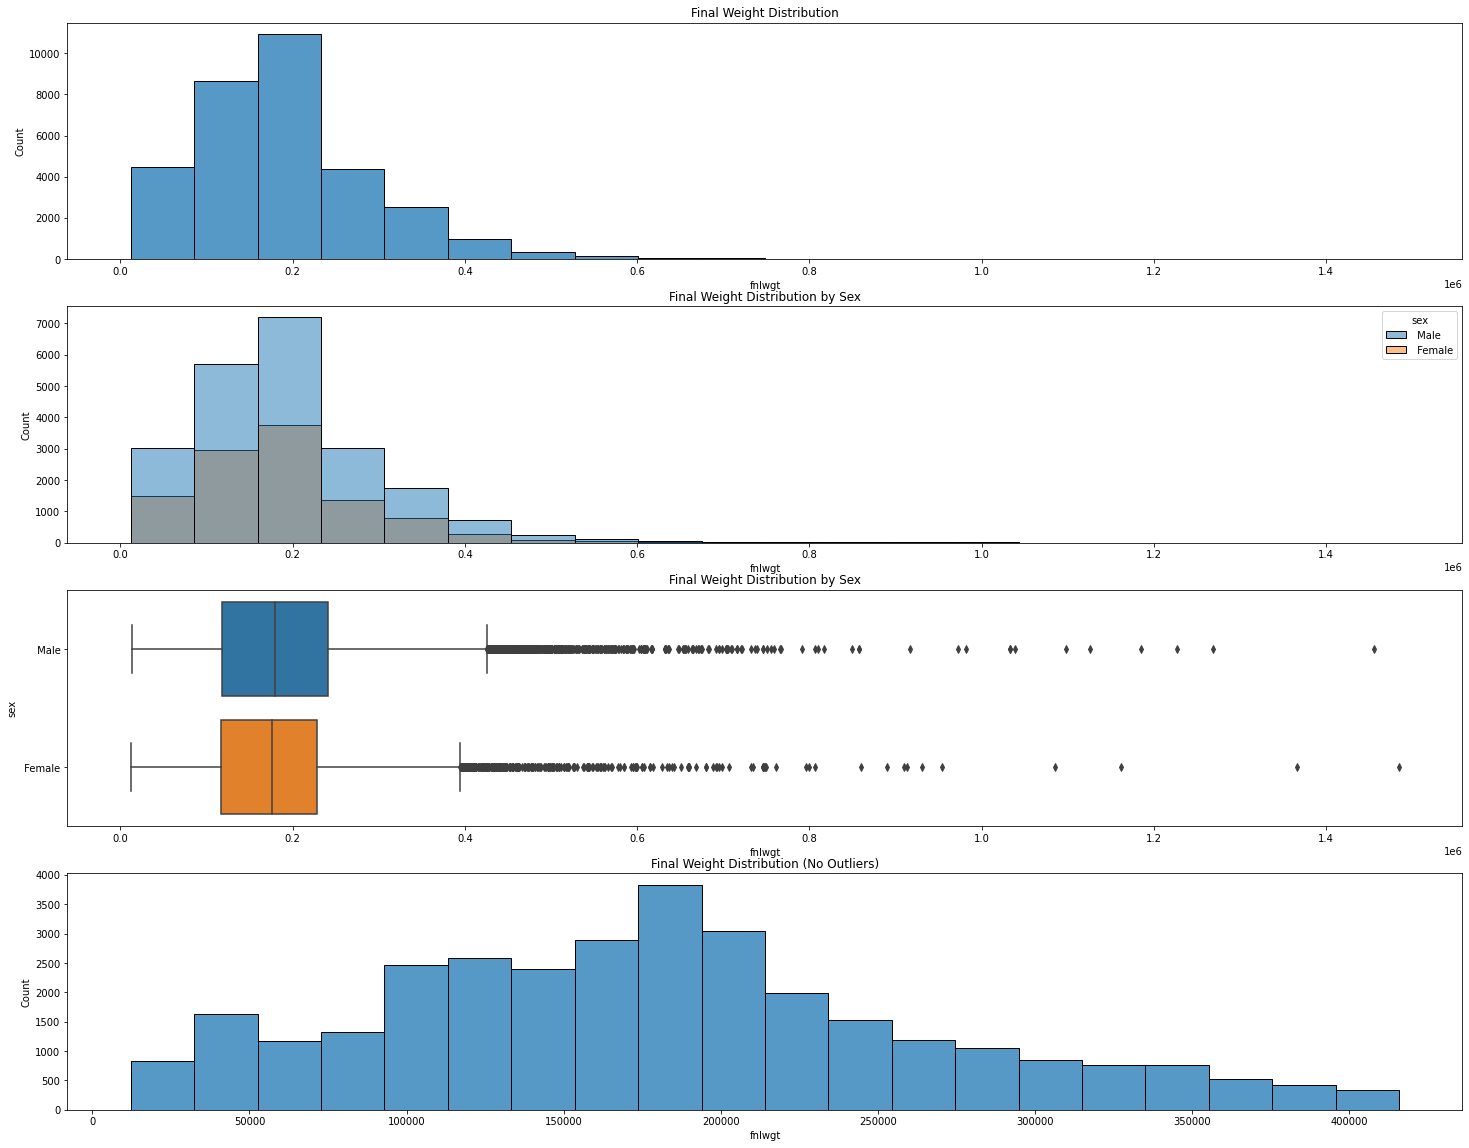

In [151]:
#fnlwgt Analysis
fig, ax = plt.subplots(4, figsize=(25,20))

sns.histplot(bins=20, data=income94, x='fnlwgt', ax=ax[0])
ax[0].set_title('Final Weight Distribution')

sns.histplot(bins=20, data=income94, x='fnlwgt', hue='sex', ax=ax[1])
ax[1].set_title('Final Weight Distribution by Sex')

sns.boxplot(data=income94, y='sex', x='fnlwgt', ax=ax[2])
ax[2].set_title('Final Weight Distribution by Sex')

# Removing Outliers (IQR Method)
Q1 = income94['fnlwgt'].quantile(0.25)
Q3 = income94['fnlwgt'].quantile(0.75)
IQR = Q3 - Q1
income94.loc[income94['fnlwgt'] < (Q1 - 1.5 * IQR), 'fnlwgt'] = np.nan
income94.loc[income94['fnlwgt'] > (Q3 + 1.5 * IQR), 'fnlwgt'] = np.nan

sns.histplot(bins=20, data=income94, x='fnlwgt', ax=ax[3])
ax[3].set_title('Final Weight Distribution (No Outliers)')

income94 = filtered

### Correlations

In [152]:
# Correlations
print("Education vs Hours: " + str(stats.pearsonr(income94['education_num'], income94['hours_per_week'])))
income94[['age', 'education_num', 'hours_per_week']].corr()


Education vs Hours: (0.14914087756384267, 1.941134359980683e-156)


,age,education_num,hours_per_week
age,1.000000,0.033927,0.069124
education_num,0.033927,1.000000,0.149141
hours_per_week,0.069124,0.149141,1.000000


In [153]:
#Male and Female correlation
male = income94[income94['sex'] == ' Male']
female = income94[income94['sex'] == ' Female']

print("Male: " + str(stats.pearsonr(male['education_num'], male['age'])))
print("Female: " + str(stats.pearsonr(female['education_num'], female['age'])))

Male: (0.05627531146581834, 2.977037525144984e-16)
Female: (-0.017080279514499877, 0.08008200181876014)


In [154]:
#Unweighted Variance and Covariance

#Since outliers were turned to missing it would not make sense to check an outliers weighted and unweighter variance
cov_check = income94.dropna(subset=['fnlwgt'])
cov_check.astype({'fnlwgt': 'int16'}).dtypes

cov_check[['education_num', 'hours_per_week']].cov()

,education_num,hours_per_week
education_num,6.575864,4.716296
hours_per_week,4.716296,153.055494


In [155]:
#Weighted Variance and Covariance
np.cov(cov_check['education_num'], cov_check['hours_per_week'], fweights=cov_check['fnlwgt'])

array([[  6.70809544,   4.61453035],
       [  4.61453035, 147.63530193]])

### Regression

In [156]:
# Regression
reg1 = smf.ols('hours_per_week ~ sex', data=income94).fit()
reg2 = smf.ols('hours_per_week ~ sex + education_num', data=income94).fit()
reg3 = smf.ols('hours_per_week ~ sex + education_num + gross_income_group', data=income94).fit()
print("Sex")
print(reg1.summary())

print("\n\nSex + Education")
print(reg2.summary())

print("\n\nSex + Education + Income Group")
print(reg3.summary())

Sex
                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1783.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        05:49:18   Log-Likelihood:            -1.2334e+05
No. Observations:               31569   AIC:                         2.467e+05
Df Residuals:                   31567   BIC:                         2.467e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       36.4089      0.117    309.93